In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from resnet.resnet import ResNetPretrained
from resnet.utils import plot_images, SaveModel
from resnet.data import get_dataloaders, generate_train_test_val
from resnet.train import train_model, test_stage
import torch
from torch import nn, optim
from torch.optim import lr_scheduler
import torchvision
from torchsummary import summary
import numpy as np
import os


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
device


device(type='cuda', index=0)

In [4]:
data_path_init = os.path.join('data')
data_path_init = {
    'train': os.path.join(data_path_init, 'Training'), 
    'test' : os.path.join(data_path_init, 'Testing')
    }
data_path_init

{'train': 'data/Training', 'test': 'data/Testing'}

In [5]:
data_paths = generate_train_test_val(data_path_init, 'tumor_dataset')
data_paths

Images in Train:567, Test:91, Valid:243 for class pituitary_tumor
Images in Train:583, Test:93, Valid:250 for class glioma_tumor
Images in Train:315, Test:50, Valid:135 for class no_tumor
Images in Train:590, Test:94, Valid:253 for class meningioma_tumor
Train, test and valid dataset were generated successfully!


{'train': 'tumor_dataset/train',
 'test': 'tumor_dataset/test',
 'val': 'tumor_dataset/val'}

In [6]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [7]:
batch_size = 16
dataloaders = get_dataloaders(data_paths, mean, std, batch_size)

In [9]:
dataloaders['train'].dataset.class_to_idx

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

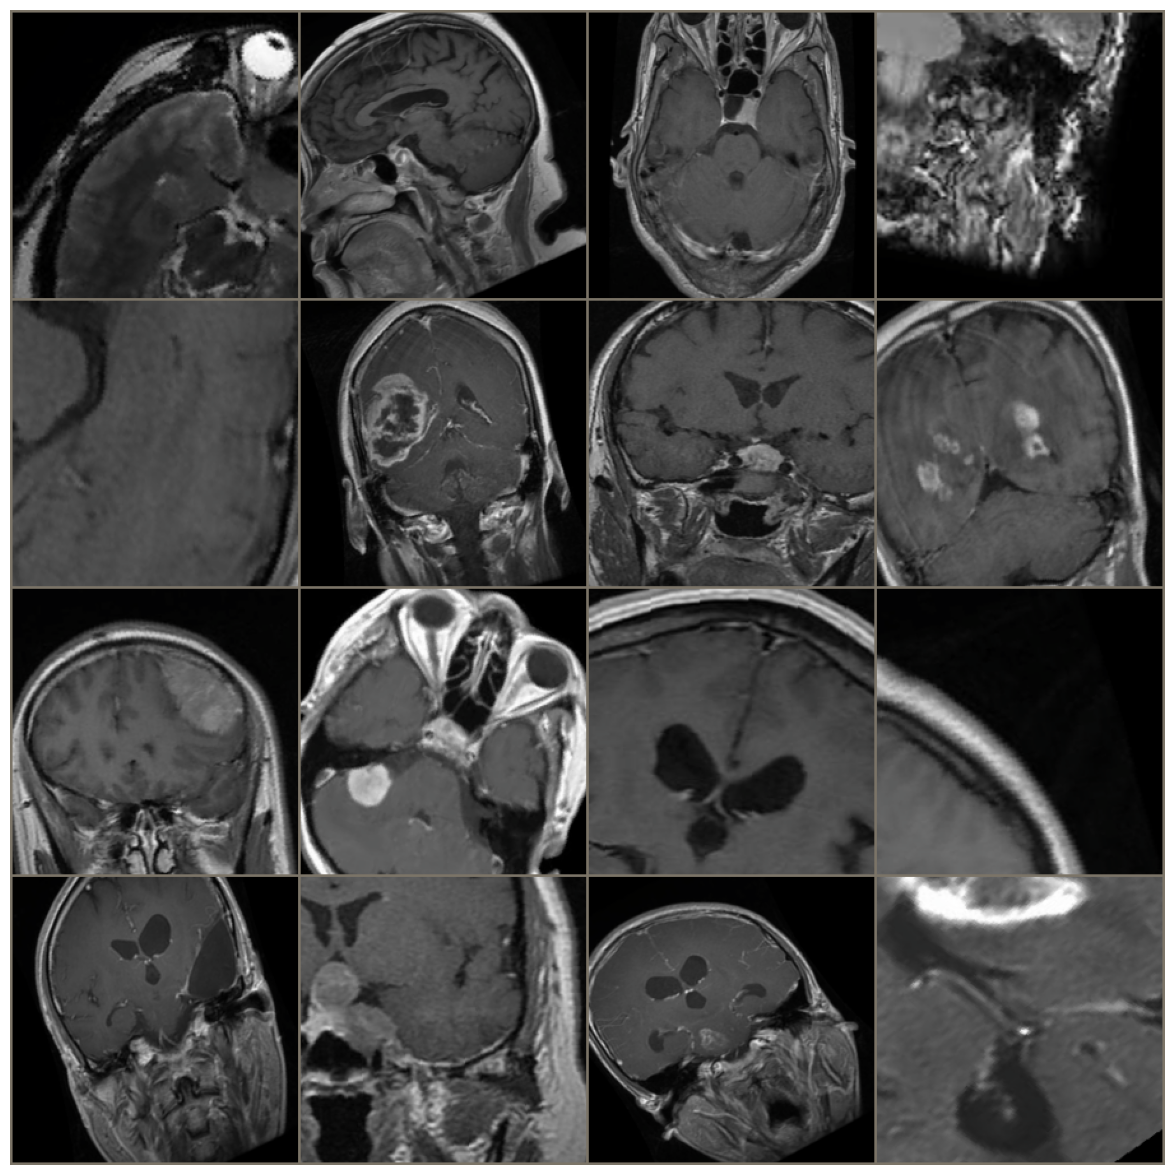

In [10]:
images, _ = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(images, nrow=4)
plot_images(out,mean, std)

In [11]:
EPOCHS=30
model = ResNetPretrained(num_classes= 4, tune_pretrained= True)
#summary(model, (3, 224, 224), device = 'cpu')
model = model.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
#scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

In [13]:
save_model = SaveModel('outputs')

[INFO]: Epoch 1 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.847, training acc: 63.627
Validation loss: 0.511, validation acc: 81.236

Best validation loss: 0.5110523443330418

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 30
Training Stage


/home/dante/anaconda3/envs/myenv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.599, training acc: 76.957
Validation loss: 0.389, validation acc: 85.812

Best validation loss: 0.3891954755241221

Saving best model for epoch: 2

--------------------------------------------------
[INFO]: Epoch 3 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.478, training acc: 81.120
Validation loss: 0.317, validation acc: 87.986

Best validation loss: 0.31712009649385103

Saving best model for epoch: 3

--------------------------------------------------
[INFO]: Epoch 4 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.442, training acc: 83.399
Validation loss: 0.294, validation acc: 89.245

Best validation loss: 0.29368353276090187

Saving best model for epoch: 4

--------------------------------------------------
[INFO]: Epoch 5 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.386, training acc: 85.431
Validation loss: 0.233, validation acc: 91.304

Best validation loss: 0.23306750286031852

Saving best model for epoch: 5

--------------------------------------------------
[INFO]: Epoch 6 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.347, training acc: 85.976
Validation loss: 0.189, validation acc: 93.021

Best validation loss: 0.18925324918871575

Saving best model for epoch: 6

--------------------------------------------------
[INFO]: Epoch 7 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.344, training acc: 87.116
Validation loss: 0.231, validation acc: 91.762
--------------------------------------------------
[INFO]: Epoch 8 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.360, training acc: 86.125
Validation loss: 0.190, validation acc: 92.449
--------------------------------------------------
[INFO]: Epoch 9 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.303, training acc: 89.197
Validation loss: 0.213, validation acc: 92.563
--------------------------------------------------
[INFO]: Epoch 10 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.317, training acc: 87.909
Validation loss: 0.192, validation acc: 93.249
--------------------------------------------------
[INFO]: Epoch 11 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.299, training acc: 89.296
Validation loss: 0.184, validation acc: 93.593

Best validation loss: 0.1842686786062338

Saving best model for epoch: 11

--------------------------------------------------
[INFO]: Epoch 12 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.296, training acc: 89.990
Validation loss: 0.158, validation acc: 95.080

Best validation loss: 0.1575717721473087

Saving best model for epoch: 12

--------------------------------------------------
[INFO]: Epoch 13 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.265, training acc: 90.436
Validation loss: 0.170, validation acc: 94.050
--------------------------------------------------
[INFO]: Epoch 14 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.243, training acc: 90.932
Validation loss: 0.168, validation acc: 94.279
--------------------------------------------------
[INFO]: Epoch 15 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.244, training acc: 91.477
Validation loss: 0.159, validation acc: 94.737
--------------------------------------------------
[INFO]: Epoch 16 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.255, training acc: 90.287
Validation loss: 0.220, validation acc: 92.449
--------------------------------------------------
[INFO]: Epoch 17 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.241, training acc: 91.427
Validation loss: 0.236, validation acc: 91.304
--------------------------------------------------
[INFO]: Epoch 18 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.251, training acc: 91.229
Validation loss: 0.151, validation acc: 94.508

Best validation loss: 0.151149302221496

Saving best model for epoch: 18

--------------------------------------------------
[INFO]: Epoch 19 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.250, training acc: 90.882
Validation loss: 0.158, validation acc: 94.966
--------------------------------------------------
[INFO]: Epoch 20 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.234, training acc: 91.278
Validation loss: 0.152, validation acc: 94.394
--------------------------------------------------
[INFO]: Epoch 21 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.225, training acc: 91.724
Validation loss: 0.161, validation acc: 95.195
--------------------------------------------------
[INFO]: Epoch 22 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.220, training acc: 92.319
Validation loss: 0.169, validation acc: 93.936
--------------------------------------------------
[INFO]: Epoch 23 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.213, training acc: 91.675
Validation loss: 0.187, validation acc: 94.050
--------------------------------------------------
[INFO]: Epoch 24 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.221, training acc: 92.071
Validation loss: 0.156, validation acc: 94.851
--------------------------------------------------
[INFO]: Epoch 25 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.196, training acc: 92.369
Validation loss: 0.177, validation acc: 93.936
--------------------------------------------------
[INFO]: Epoch 26 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.208, training acc: 93.360
Validation loss: 0.165, validation acc: 94.966
--------------------------------------------------
[INFO]: Epoch 27 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.197, training acc: 93.062
Validation loss: 0.146, validation acc: 94.508

Best validation loss: 0.14602470184591684

Saving best model for epoch: 27

--------------------------------------------------
[INFO]: Epoch 28 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.181, training acc: 93.062
Validation loss: 0.179, validation acc: 94.279
--------------------------------------------------
[INFO]: Epoch 29 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.195, training acc: 92.369
Validation loss: 0.162, validation acc: 95.195
--------------------------------------------------
[INFO]: Epoch 30 of 30
Training Stage


  0%|          | 0/127 [00:00<?, ?it/s]

Validation Stage


  0%|          | 0/55 [00:00<?, ?it/s]

Training loss: 0.201, training acc: 94.103
Validation loss: 0.166, validation acc: 94.737
--------------------------------------------------
Saving final model...
TRAINING COMPLETE


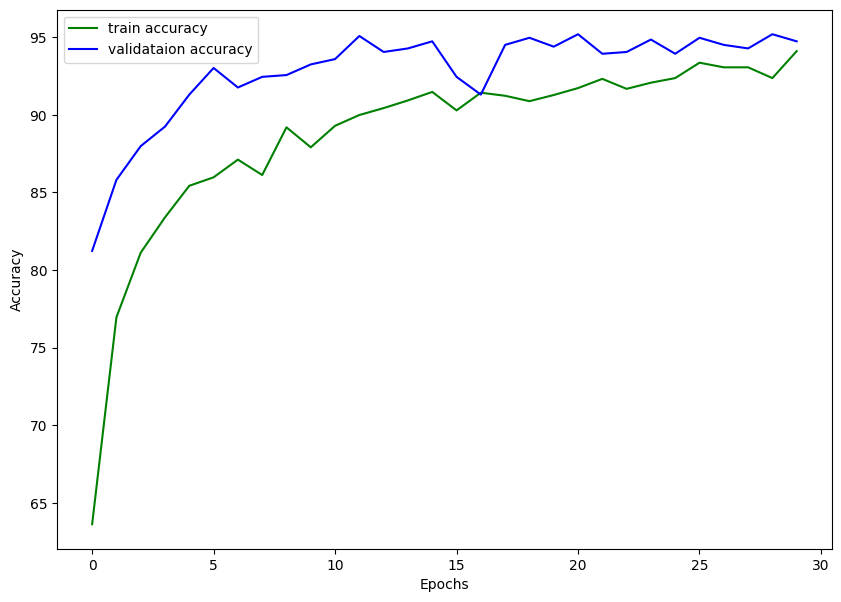

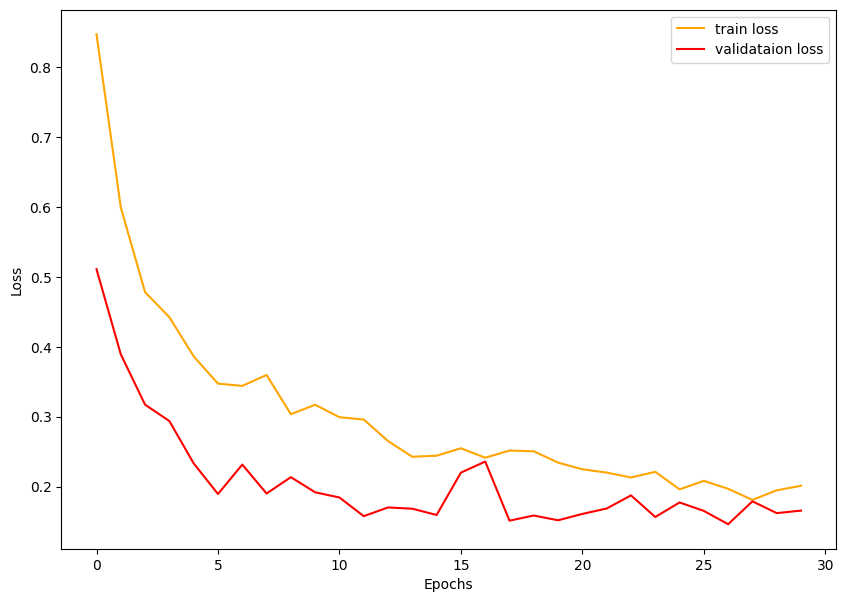

In [16]:
train_model(model, dataloaders, optimizer, scheduler, criterion, EPOCHS, device, save_model, 4)

In [83]:
test_epoch_loss, test_epoch_acc = test_stage(model, dataloaders['test'], criterion, device)
print(f"Test loss: {test_epoch_loss} and Test accuracy: {test_epoch_acc}")

Test Stage


  0%|          | 0/21 [00:00<?, ?it/s]

Test loss: 0.12945196390639813 and Test accuracy: 96.3302752293578
